In [1]:
import matplotlib.pyplot as plt
import math

In [4]:
from pathlib import *
filepath=Path('/home/mz071159/width_struts/results/50_45_leofor_thresholding')
filepath
print(list(filepath.glob('**/*total_ms.png')))

[PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/pano50_45_eps5_leo_5mm_3_stitch_c004_r002_total_ms.png'), PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/full_segmentation/50_45_3mm_yolo_eps5_leo_3stitched-0_/50_45_3mm_yolo_eps5_leo_3stitched-0_c001_r004_total_ms.png'), PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/full_segmentation/50_45_3mm_yolo_eps5_leo_3stitched-0_/50_45_3mm_yolo_eps5_leo_3stitched-0_c004_r006_total_ms.png'), PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/full_segmentation/50_45_3mm_yolo_eps5_leo_3stitched-0_/50_45_3mm_yolo_eps5_leo_3stitched-0_c006_r001_total_ms.png'), PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/full_segmentation/50_45_3mm_yolo_eps5_leo_3stitched-0_/50_45_3mm_yolo_eps5_leo_3stitched-0_c004_r001_total_ms.png'), PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/full_segmentation/50_45_3mm_yolo_ep

In [6]:
import re
lfp=list(filepath.glob('**/*total_ms.png'))[0]
lfp.parents[0].stem
    # a=re.search(lfp.parens[0].stem)

'50_45_leofor_thresholding'

In [7]:
re.findall('.*(?=c\d\d\d\_r\d\d\d)',lfp.parents[0].stem)[0]

IndexError: list index out of range

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util 
from skimage import measure
from skimage import io
import pandas as pd
from skimage import morphology
from skimage.util import invert
import scipy
import numpy as np
# Construct some test data
# x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
# r = np.sin(np.exp(np.sin(x)**3 + np.cos(y)**2))
img=io.imread("/rwthfs/rz/cluster/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c004_r000/bnw_conv.png")

# img=io.imread("/work/mz071159/quasi-in-situ/50_45_leo/for_thresholding/5mm_3/pano50_45_eps5_leo_5mm_3_stitch_c000_r000.jpg")
# Find contours at a constant value of 0.8
# img=img[:,:,0]
img[:,0]=255
img[:,-1]=255
img[-1,:]=255
img[0,:]=255# Display the image and plot all contours found
contours = measure.find_contours(img,level=55,fully_connected='high',positive_orientation='high')
fig, ax = plt.subplots(figsize=(10,10))
# ax.imshow(r, cmap=plt.cm.gray)
ax.imshow(img,alpha=1,cmap='binary')
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)

ax.axis('image')
# ax.set_xticks([])
# ax.set_yticks([])
# # plt.show()


# img_ind=np.where(skel)
# ax.imshow(img,alpha=0.5,zorder=2,cmap=mpl.cm.gray)
# ax.imshow(invert(skel),cmap=mpl.cm.gray,zorder=1)
# for contour in conts:
    # ax.plot(contour[:, 1], contour[:, 0], linewidth=1,color='black',zorder=2)

x=100
y=0# ax.scatter(img_ind[1],img_ind[0],s=0.05,color='black')
ax.set_ylim(x,x+1000)
ax.set_xlim(y,y+1000)

FileNotFoundError: No such file: '/rwthfs/rz/cluster/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c004_r000/bnw_conv.png'

In [9]:
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
label_img = label(mg_holes_removed)
# regions = regionprops(label_img,mg_holes_removed)

for region in regions:
    plt.scatter(i,(region.perimeter)/(region.equivalent_diameter_area*3.1415))
    if(region.perimeter)/(region.equivalent_diameter_area*3.1415)>1.5:
        l_list.append(region.label)
    i=i+1
plt.ylabel('perimeter over radius')

NameError: name 'mg_holes_removed' is not defined

In [10]:
label_img = label(invert(img))
properties=['label','bbox','area','area_convex','equivalent_diameter_area','axis_major_length','axis_minor_length']
props=measure.regionprops_table(label_img,img,properties=properties)
df=pd.DataFrame(props)
df

NameError: name 'img' is not defined

In [8]:
mean_diameter=df.loc[(df['area_convex']>5),'axis_minor_length'].mean()
mean_diameter ## we want to use this to find the appropriate parameter for the dilation

41.889285658350765

In [9]:
import numpy as np
# https://stackoverflow.com/questions/1066758/find-length-of-sequences-of-identical-values-in-a-numpy-array-run-length-encodi
def rle(inarray):
        """ run length encoding. Partial credit to R rle function. 
            Multi datatype arrays catered for including non Numpy
            returns: tuple (runlengths, startpositions, values) """
        ia = np.asarray(inarray)                # force numpy
        n = len(ia)
        if n == 0: 
            return (None, None, None)
        else:
            y = ia[1:] != ia[:-1]               # pairwise unequal (string safe)
            i = np.append(np.where(y), n - 1)   # must include last element posi
            z = np.diff(np.append(-1, i))       # run lengths
            p = np.cumsum(np.append(0, z))[:-1] # positions
            return(z, p, ia[i])

In [10]:
dil_iter=(mean_diameter/6)*2
print(dil_iter)
dil_iter=math.ceil(dil_iter)
dil_iter


13.963095219450254


14

In [11]:
sns.displot(data=df,x='axis_minor_length')

NameError: name 'sns' is not defined

In [12]:
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat, disk)
footprint = disk(15)
# dilation=dilation(img==0, footprint)

# closing= closing(invert(img), footprint)


In [13]:
    for i in range(0,n_x):
        [width,pos,value]=rle(total_ms[:,step_x*i])
        total_ms[:,step_x*i]=4
        l_width.append(width)
        l_pos.append(pos)
        l_value.append(value)
    ##y
    for i in range(0,n_y):
        [width,pos,value]=rle(total_ms[step_y*i,:])
        total_ms[step_y*i,:]=4
        l_width.append(width)
        l_pos.append(pos)
        l_value.append(value)

NameError: name 'n_x' is not defined

NameError: name 'total_ms' is not defined

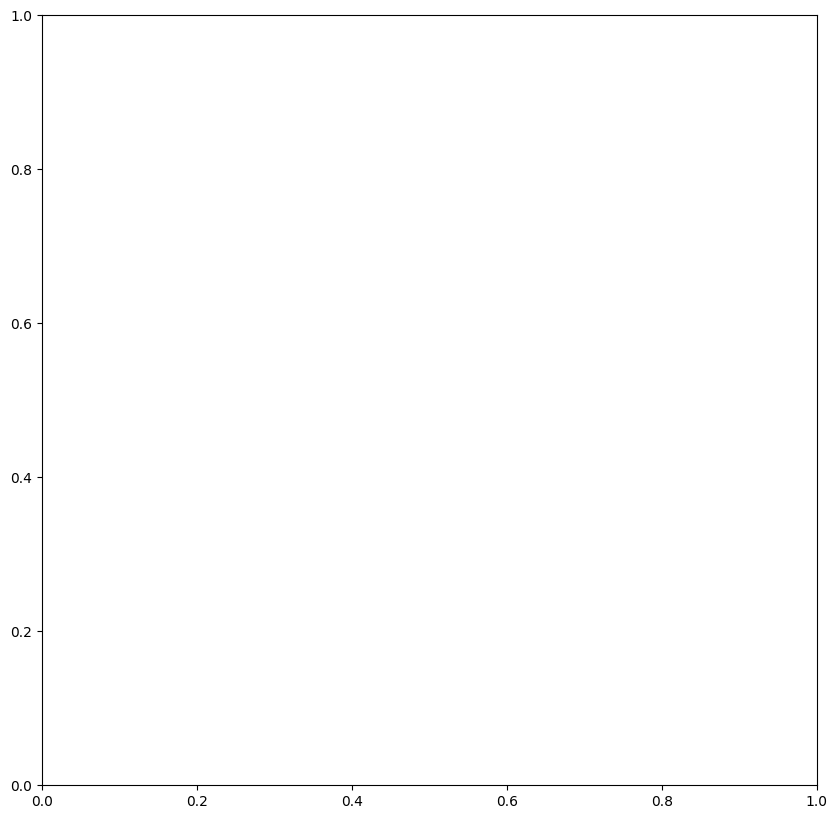

In [14]:
fig,ax=plt.subplots(figsize=(10,10))
ax.imshow(total_ms)

In [326]:
n_y

4

In [15]:
l_width=[]  
l_pos=[]    
l_value=[]
##x
aspect=total_ms.shape[1]/total_ms.shape[0]
if aspect >=1:
    step_x=math.floor(max(total_ms.shape)/10)
    step_y=step_x
    # step_y=math.floor(step_x/aspect)
    n_x=10
    n_y=math.floor(n_x/aspect)
else:
    step_y=math.floor(max(total_ms.shape)/10)
    # step_x=math.floor(step_y*aspect)
    step_x=step_y
    n_y=10
    n_x=math.floor(n_y*aspect)

NameError: name 'total_ms' is not defined

In [328]:
step_x,step_y

(400, 400)

Text(0.5, 0, 'x')

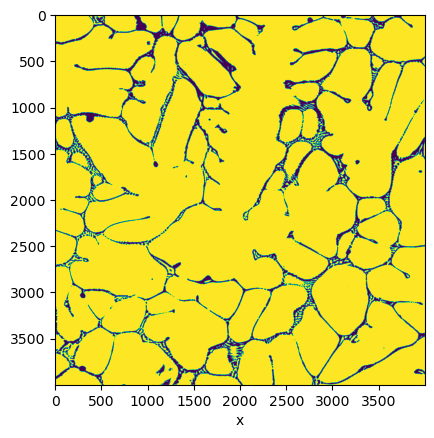

In [329]:
plt.imshow(img)
plt.xlabel('x')

In [330]:
img.shape

(4000, 4000)

In [16]:
dilation2=scipy.ndimage.binary_dilation(img==0,disk(3),iterations=dil_iter)

In [332]:
dil_iter

7

(0.0, 300.0)

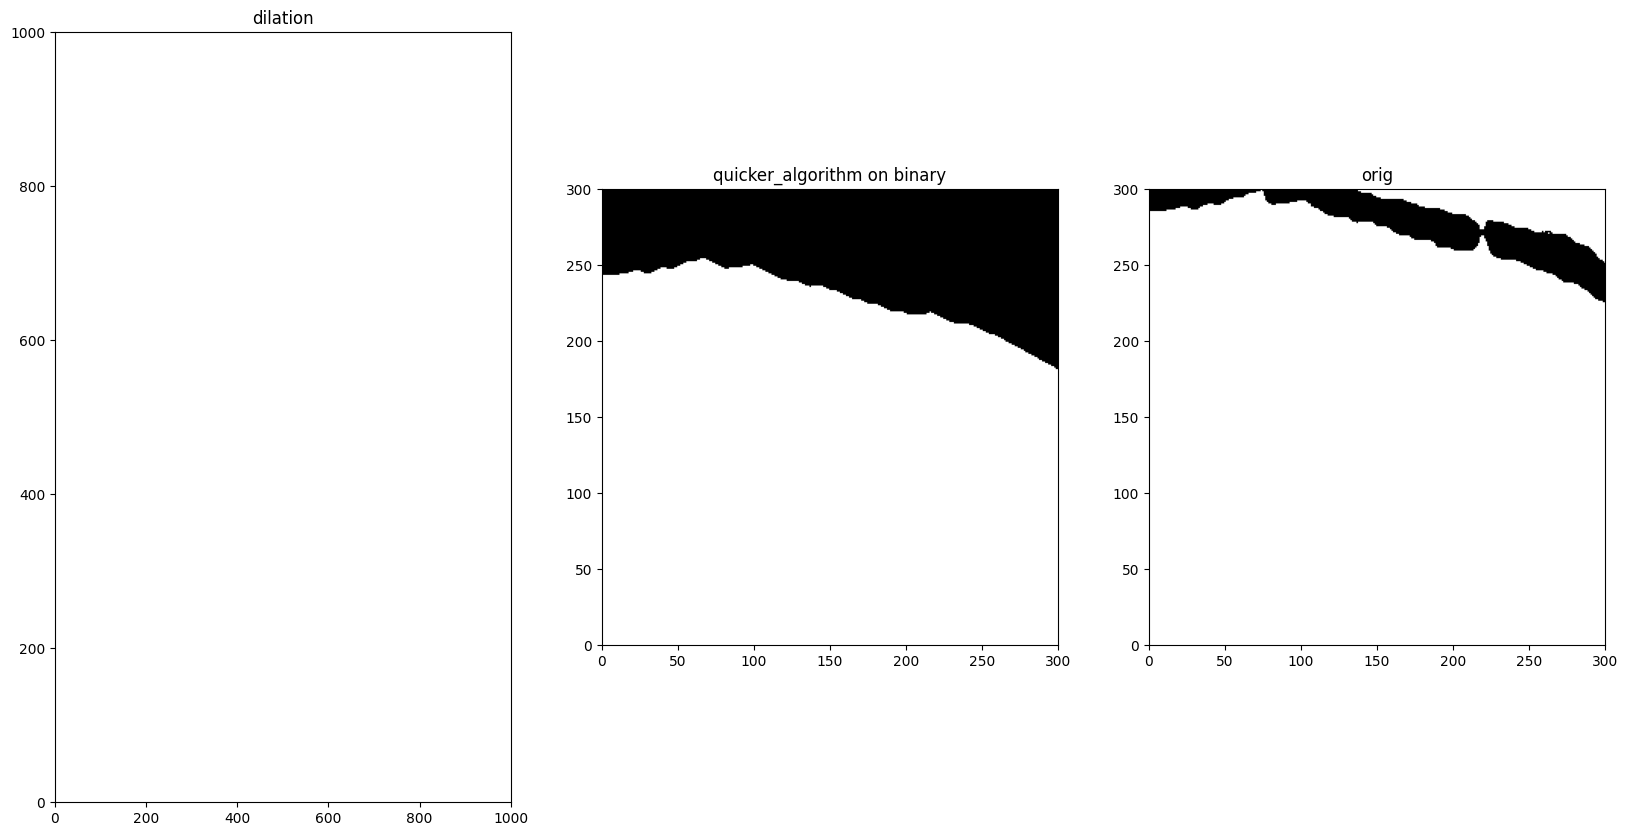

In [17]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
# ax[0].imshow(dilation,cmap='binary')
ax[0].set_title('dilation')
ax[0].set_xlim([0,1000])
ax[0].set_ylim([0,1000])
ax[1].imshow(dilation2,cmap='binary')
ax[1].set_title('quicker_algorithm on binary')
ax[1].set_xlim([0,300])
ax[1].set_ylim([0,300])
ax[2].imshow(img,cmap='gray')
ax[2].set_title('orig')
ax[2].set_xlim([0,300])
ax[2].set_ylim([0,300])

(0.0, 1500.0)

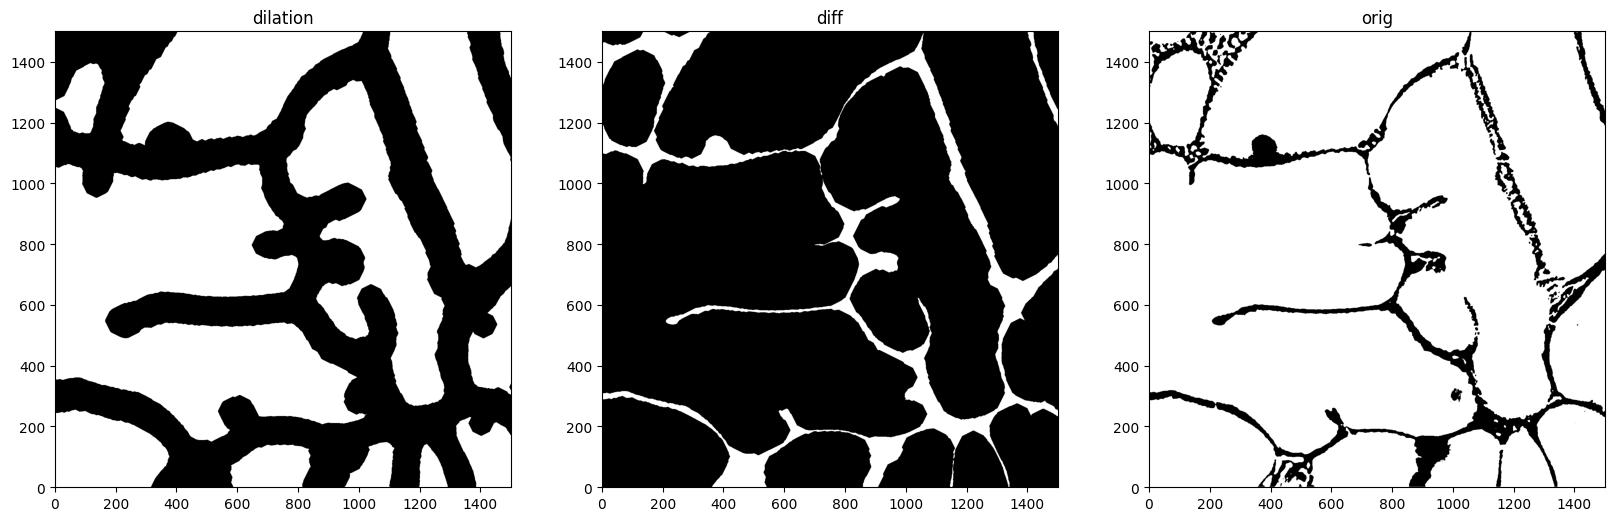

In [18]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(dilation2,cmap='binary')
ax[0].set_title('dilation')
ax[0].set_xlim([0,1500])
ax[0].set_ylim([0,1500])
footprint = disk(15)
#erosion=erosion(dilation, footprint)
erosion2=scipy.ndimage.binary_dilation(invert(dilation2),disk(3),iterations=dil_iter+1)
ax[1].imshow(erosion2,cmap='binary')
ax[1].set_title('diff')
ax[1].set_xlim([0,1500])
ax[1].set_ylim([0,1500])
ax[2].imshow(img,cmap='gray')
ax[2].set_title('orig')
ax[2].set_xlim([0,1500])
ax[2].set_ylim([0,1500])

(0.0, 1500.0)

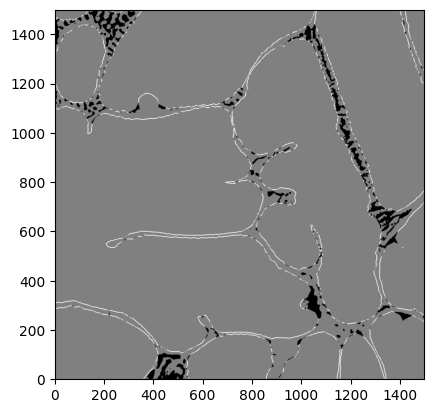

In [19]:
plt.imshow(erosion2-invert(img),cmap='gray')
plt.xlim([0,1500])
plt.ylim([000,1500])

In [20]:
# border=dilation2-erosion2
# border=border!=0

In [21]:
eutectic_mask=erosion2-invert(img)
eutectic_mask=eutectic_mask==0

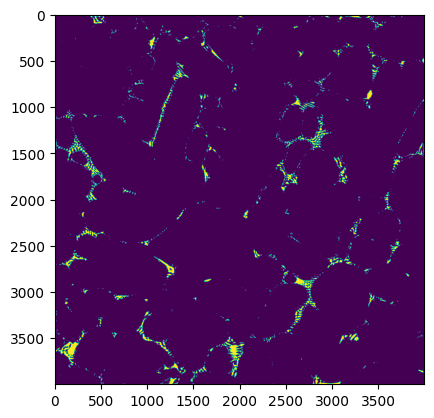

In [22]:
plt.imshow(eutectic_mask)

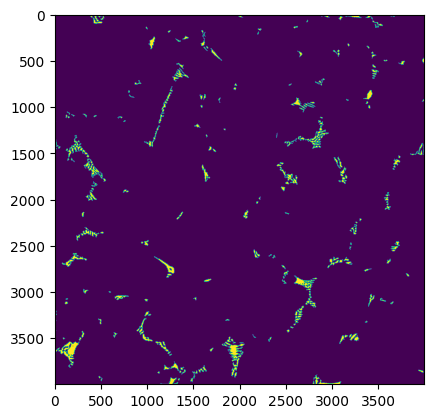

In [23]:
mg_eut_filtered=morphology.remove_small_objects(eutectic_mask,min_size=200)
plt.imshow(mg_eut_filtered)
# plt.xlim([1000,2500])
# plt.ylim([1000,2500])

In [24]:
mg_primary=dilation2==0

In [25]:
mg_primary

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [26]:
total_ms=np.zeros(img.shape)
# total_ms[mg_primary]=1
total_ms[img==0]=1
total_ms[mg_eut_filtered]=2

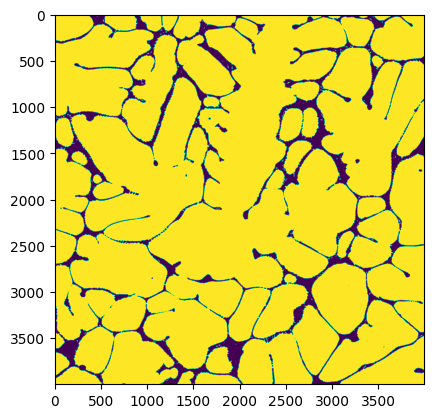

In [27]:
plt.imshow(total_ms==0)

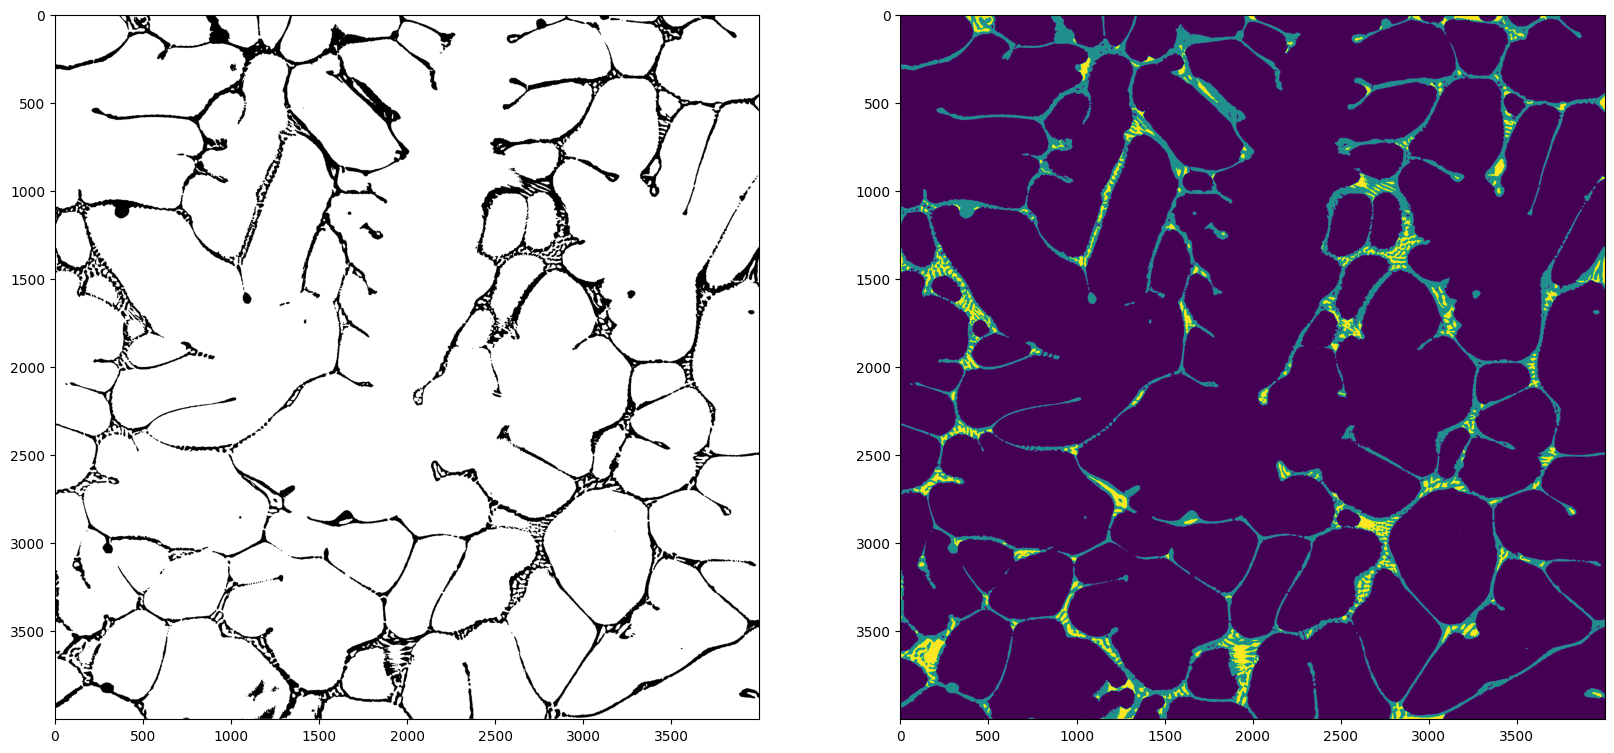

In [28]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img,cmap='gray')
# ax[0].set_xlim([1000,2500])
# ax[0].set_ylim([1000,2500])
ax[1].imshow(total_ms)
# ax[1].set_xlim([1000,2500])
# ax[1].set_ylim([1000,2500])

In [27]:
import matplotlib.pyplot as plt

In [31]:
mg_holes_removed=morphology.remove_small_holes(mg_primary==True,50000)

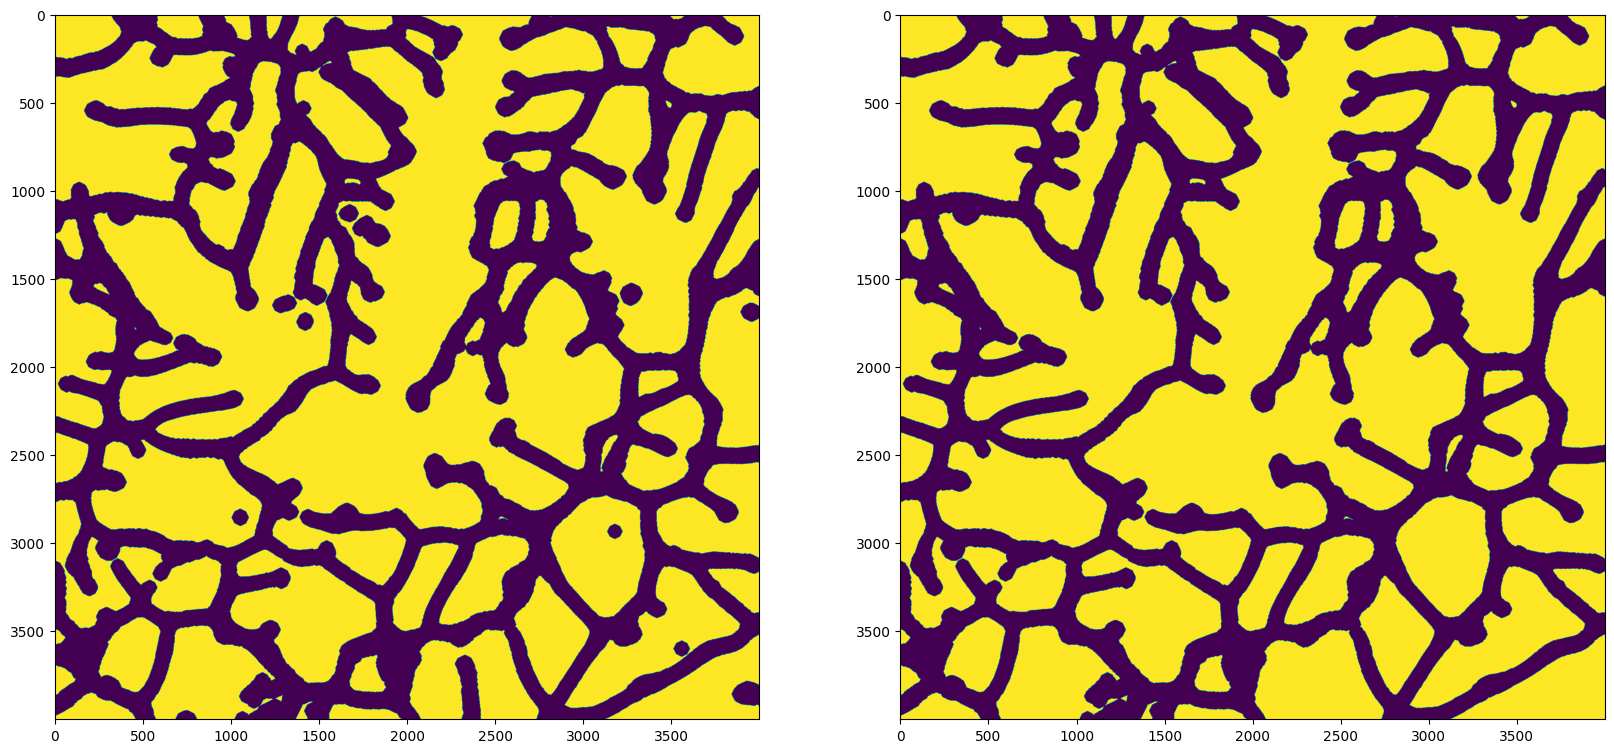

In [32]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(mg_primary)
ax[1].imshow(mg_holes_removed)

In [30]:
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
label_img = label(mg_holes_removed)
regions = regionprops(label_img,mg_holes_removed)

NameError: name 'mg_holes_removed' is not defined

In [52]:
plt.imsave("full_img_sk.png", total_ms, cmap='binary')

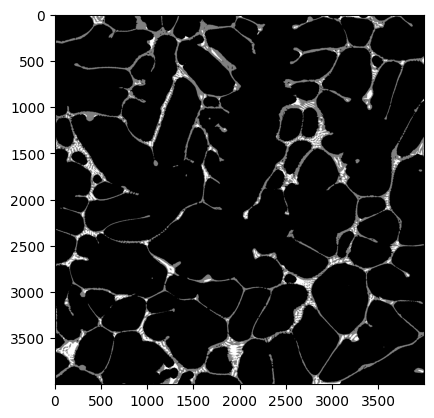

In [46]:
plt.imshow(total_ms,cmap='gray')

In [186]:
# l_img=morphology.label(invert(closing))
properties=['label','bbox','area','area_convex','euler_number','image','perimeter']
props=measure.regionprops_table(label_img,mg_holes_removed,properties=properties)
df=pd.DataFrame(props)
df

,label,bbox-0,bbox-1,bbox-2,bbox-3,area,area_convex,euler_number,image,perimeter
0,1,0,0,309,155,37992,41413,1,"[[True, True, True, True, True, True, True, Tr...",943.529004
1,2,0,209,222,557,63941,64776,1,"[[False, False, False, False, False, False, Fa...",1038.233585
2,3,0,607,342,1333,154864,167297,1,"[[True, True, True, True, True, True, True, Tr...",2047.763635
3,4,0,1387,144,1752,39645,41952,1,"[[True, True, True, True, True, True, True, Tr...",985.482323
4,5,0,1852,280,2569,101078,127106,1,"[[True, True, True, True, True, True, True, Tr...",2235.747438
...,...,...,...,...,...,...,...,...,...,...
58,59,3751,2417,3755,2422,6,9,1,"[[True, False, False, False, False], [True, Tr...",5.828427
59,60,3767,1587,4000,2430,136896,143576,1,"[[False, False, False, False, False, False, Fa...",2028.859090
60,61,3868,599,3883,611,74,91,1,"[[False, False, False, False, False, False, Fa...",38.142136
61,62,3909,501,4000,787,15022,16019,1,"[[False, False, False, False, False, False, Fa...",659.475180


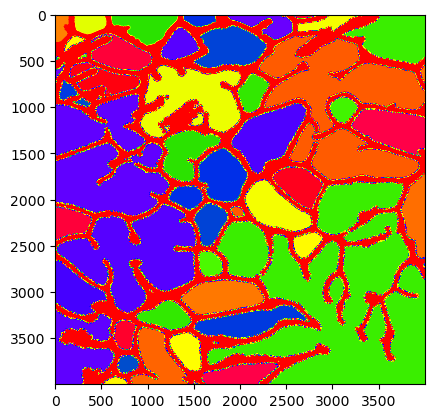

In [188]:
plt.imshow(label_img,cmap='prism')

In [189]:
plt.imsave("labeled_ms.png",label_img,cmap='gist_rainbow')

In [190]:
dilation_skel=scipy.ndimage.binary_dilation(skel!=0,disk(5),iterations=2)

NameError: name 'skel' is not defined

In [40]:
# skel2, distance = morphology.medial_axis(mg_holes_removed, return_distance=True)

NameError: name 'skel' is not defined

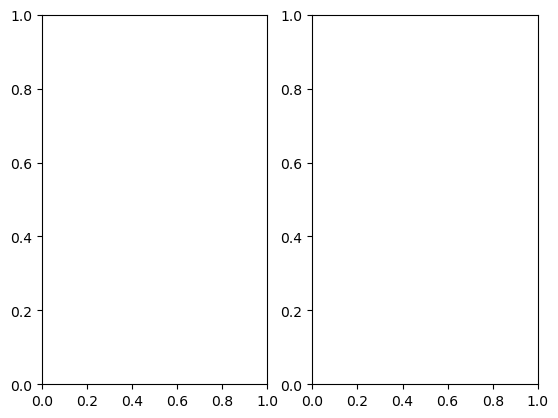

In [191]:
fig,ax=plt.subplots(1,2)
ax[0].imshow(skel,cmap='binary')
ax[0].set_xlim([0,2000])
ax[0].set_ylim([0,2000])
ax[1].imshow(skel2,cmap='binary')
ax[1].set_xlim([0,2000])
ax[1].set_ylim([0,2000])

In [300]:
shattered=np.isin(label_img,l_list)

In [301]:
l_list

[5,
 6,
 8,
 12,
 13,
 15,
 17,
 18,
 19,
 20,
 23,
 25,
 28,
 32,
 34,
 37,
 39,
 41,
 50,
 52,
 53,
 55,
 57,
 60,
 62,
 63,
 5,
 6,
 8,
 12,
 13,
 15,
 17,
 18,
 19,
 20,
 23,
 25,
 28,
 32,
 34,
 37,
 39,
 41,
 50,
 52,
 53,
 55,
 57,
 60,
 62,
 63,
 5,
 6,
 8,
 12,
 13,
 15,
 17,
 18,
 19,
 20,
 23,
 25,
 28,
 32,
 34,
 37,
 39,
 41,
 50,
 52,
 53,
 55,
 57,
 60,
 62,
 63]

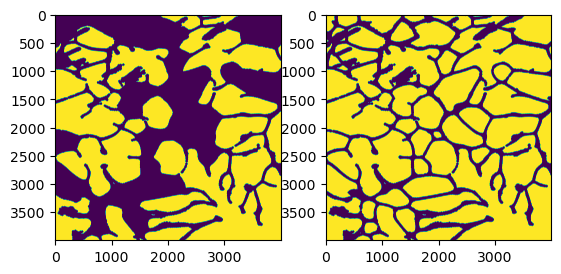

In [302]:
fig,ax=plt.subplots(1,2)
ax[0].imshow(shattered)
ax[1].imshow(mg_holes_removed)

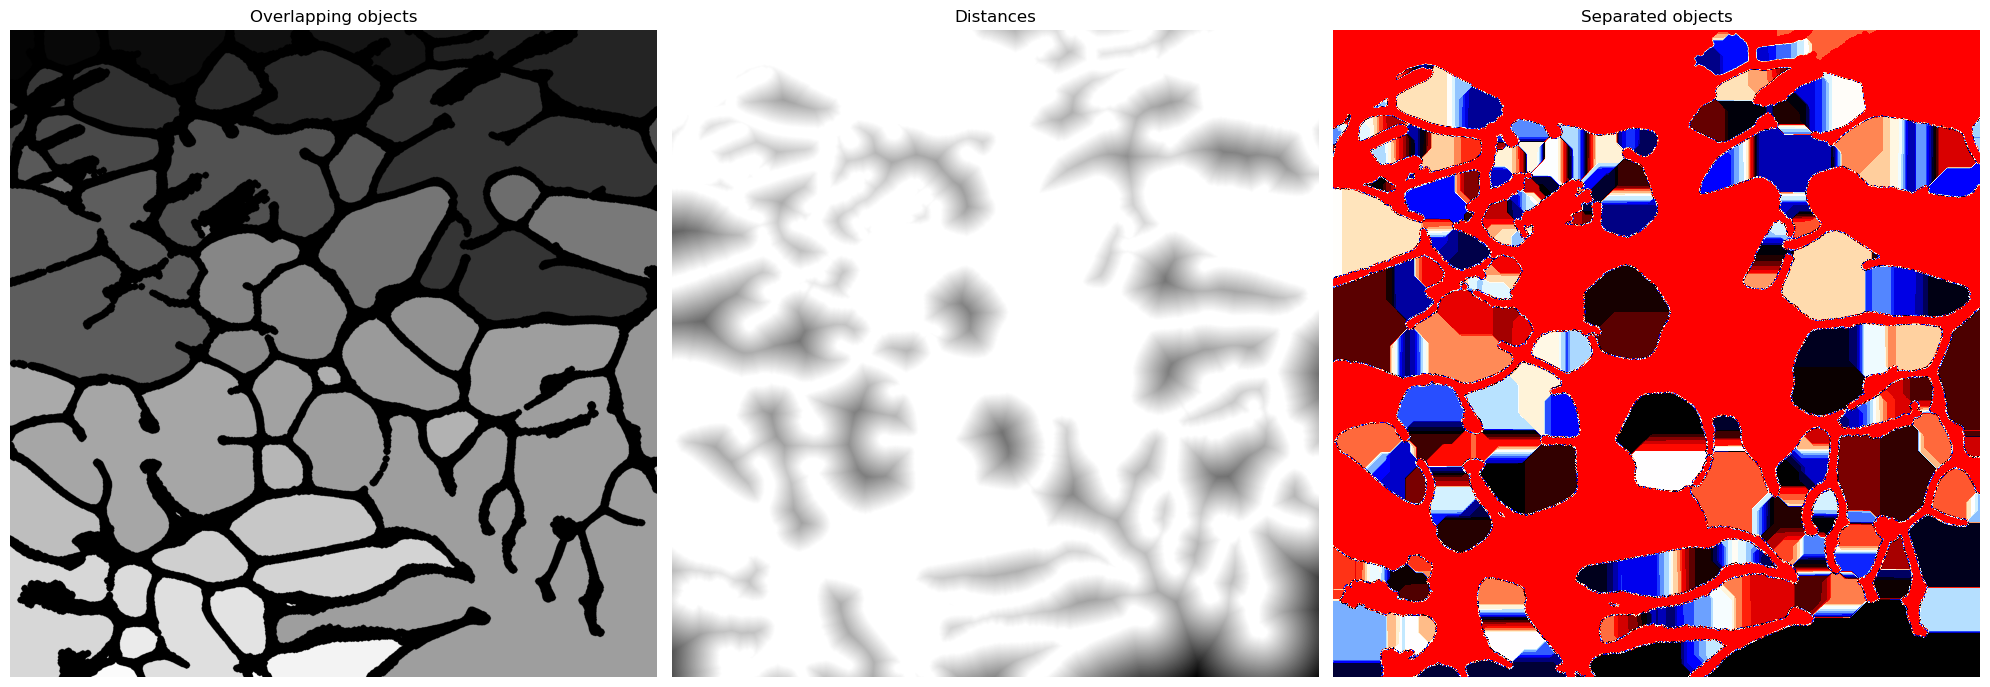

In [306]:
## idea: https://www.mdpi.com/1996-1944/14/11/2827
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage as ndi

# Generate an initial image with two overlapping circles
# x, y = np.indices((80, 80))
# x1, y1, x2, y2 = 28, 28, 44, 52
# r1, r2 = 16, 20
# mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
# mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
# image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
analyse=shattered
distance = ndi.distance_transform_edt(analyse)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=analyse)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=analyse)

fig, axes = plt.subplots(ncols=3, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(label_img, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap='flag')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [305]:
plt.imsave('labels.png',labels,cmap='flag')

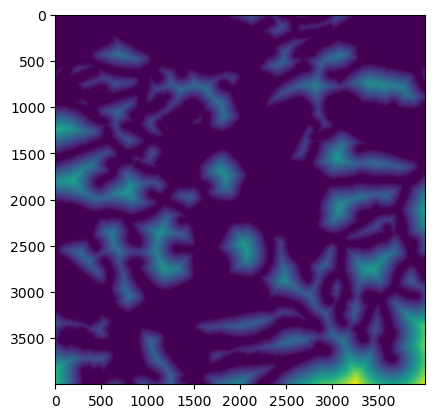

In [304]:
distance = ndi.distance_transform_edt(analyse,sampling=200)
plt.imshow(distance)

NameError: name 'cons' is not defined

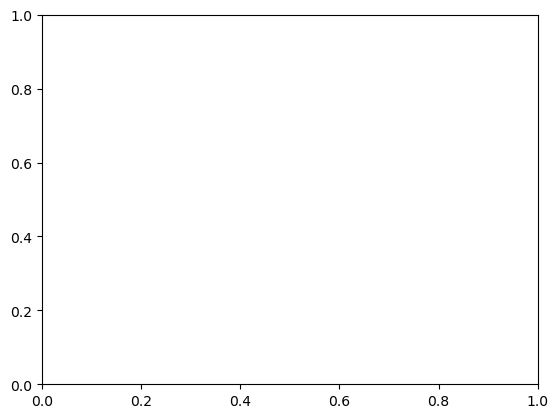

In [285]:
imgi=regions[13].image
imgi[:,0]=0
imgi[:,-1]=0
imgi[-1,:]=0
imgi[0,:]=0
# cons=find_contours(imgi,fully_connected='low',positive_orientation='low')
fig, ax = plt.subplots()
# ax.imshow(r, cmap=plt.cm.gray)
for contour in cons:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [76]:
from skimage.color import rgb2gray
total_ms=rgb2gray(img[:,:,0:3])

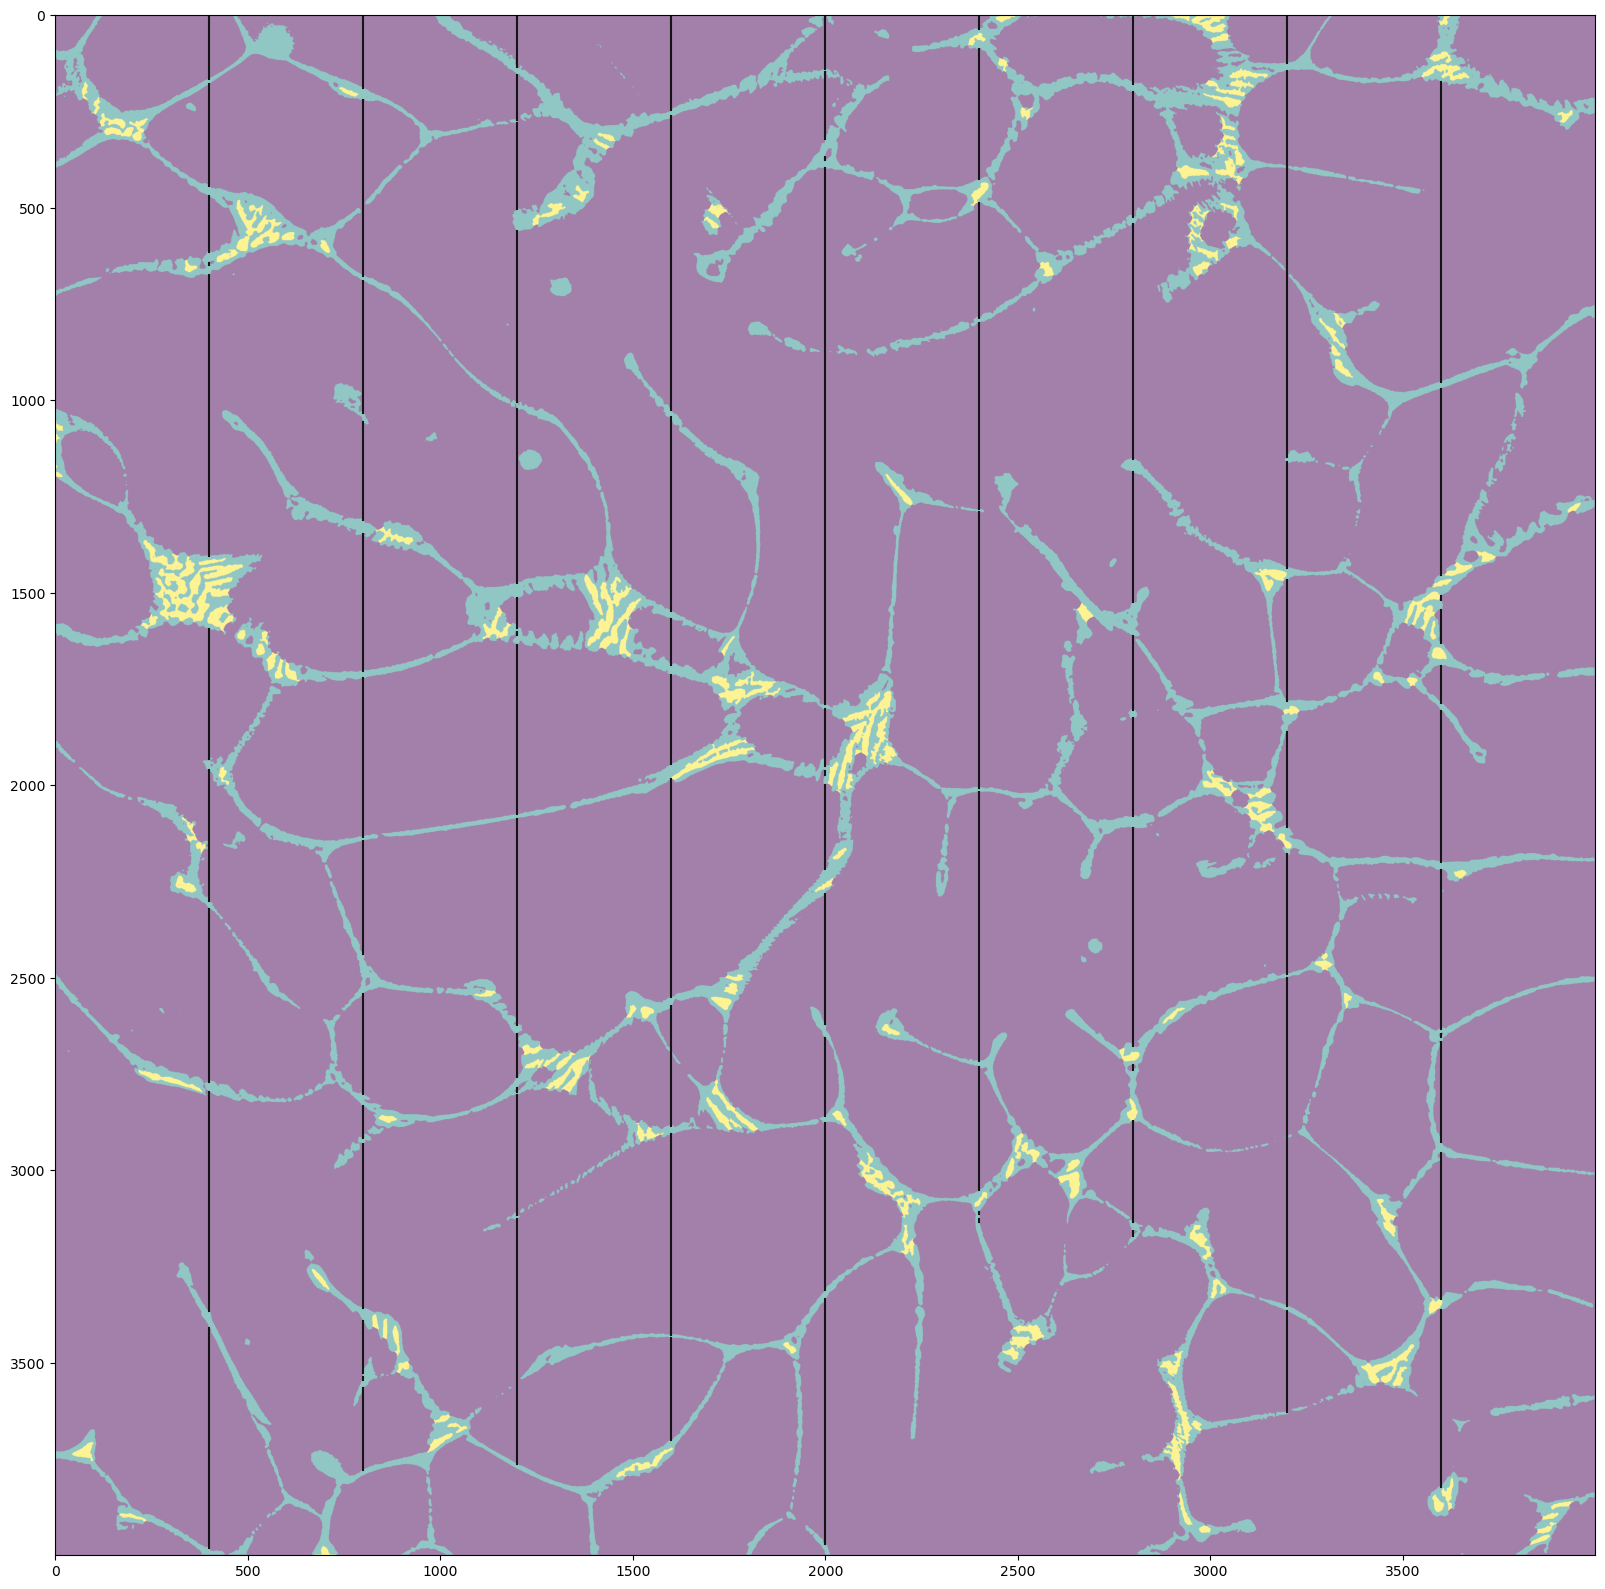

In [113]:

l_width=[]  
l_pos=[]    
l_value=[]
fig,ax=plt.subplots(figsize=(20,20))
plt.imshow(img,alpha=0.5)
##x
aspect=total_ms.shape[1]/total_ms.shape[0]
if aspect >=1:
    step_x=math.floor(max(total_ms.shape)/10)
    step_y=math.floor(step_x/aspect)
    n_x=10
    n_y=math.floor(n_x/aspect)
else:
    step_y=math.floor(max(total_ms.shape)/10)
    step_x=math.floor(step_y*aspect)
    n_y=10
    n_x=math.floor(n_y*aspect)


for i in range(0,n_x):
    # pos=[]
    # plt.plot([step_x*i,step_x*i],[0,4000],color='white')
    [width,pos,value]=rle(total_ms[:,step_x*i])
    l_width.append(width)
    l_pos.append(pos)
    l_value.append(value)
    for j in range (0,len(width)-1):
        if value[j]<0.1:
            plt.plot([step_x*i,step_x*i],pos[j:j+2],color=[value[j],value[j],value[j]])
# ##y
# for i in range(0,n_y):
#     plt.plot([0,4000],[step_x*i,step_x*i],color='white')
#     [width,pos,value]=rle(total_ms[step_y*i,:])
#     l_width.append(width)
#     l_pos.append(pos)
#     l_value.append(value)
    
    # np.savetxt(fp.parents[1].joinpath('full_segmentation').joinpath(re.findall('.*(?=c\d\d\d\_r\d\d\d)',fp.parents[0].stem)[0]).joinpath(f'{fp.parents[0].stem}_total_ms.csv'),np.transpose([np.concatenate(l_width),np.concatenate(l_pos),np.concatenate(l_value)]),delimiter=';',header='widths;pos;value;',comments='')

frac_laves=np.count_nonzero(total_ms==1)/(img.shape[0]*img.shape[1])
frac_mg=np.count_nonzero(total_ms==0)/(img.shape[0]*img.shape[1])
frac_mg_eut=np.count_nonzero(total_ms==2)/(img.shape[0]*img.shape[1])
# np.savetxt(fp.parents[1].joinpath('full_segmentation').joinpath(re.findall('.*(?=c\d\d\d\_r\d\d\d)',fp.parents[0].stem)[0]).joinpath(f'{fp.parents[0].stem}_phase_fraction.csv'),[frac_laves,frac_mg,frac_mg_eut],delimiter=';',header='frac_laves;frac_mg;frac_mg_eut',comments='')



(array([3., 3., 0., 1., 1., 3., 1., 0., 0., 1.]),
 array([  9. ,  85.9, 162.8, 239.7, 316.6, 393.5, 470.4, 547.3, 624.2,
        701.1, 778. ]),
 <BarContainer object of 10 artists>)

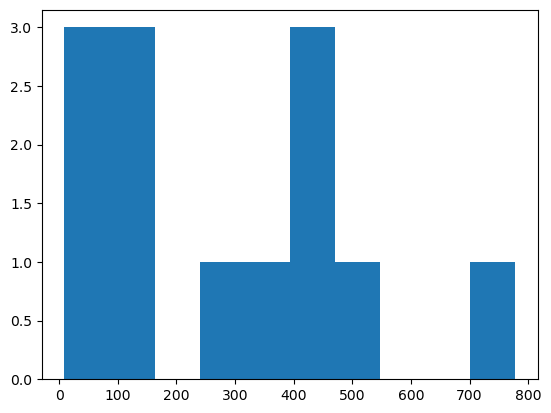

In [114]:
plt.hist(width[value<0.1])

/tmp/ipykernel_160225/4086500069.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(l_value)<0.1


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [110]:
value[value<0.1],width[value<0.1].mean()

(array([0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
        0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
        0.08322275, 0.08322275, 0.08322275]),
 266.6923076923077)

In [96]:
len(width)

41

In [79]:
pos

array([   0,    1,   16,   27,   98,  114,  127,  148,  174,  952,  969,
       1453, 1469, 1484, 1507, 1508, 1519, 1543, 1630, 1645, 1673, 1689,
       1787, 1806, 2200, 2219, 2632, 2645, 2654, 2667, 2925, 2954, 2969,
       2976, 3333, 3352, 3362, 3822, 3862, 3885, 3897])

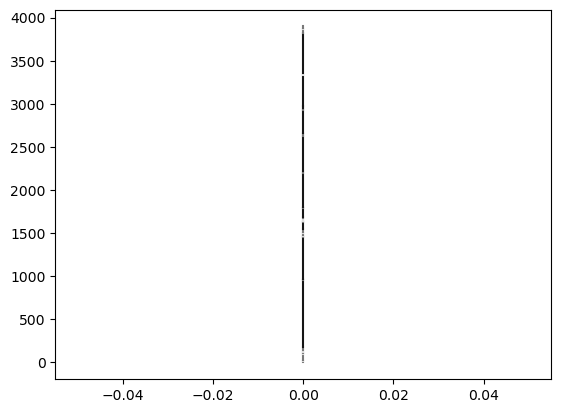

In [87]:
for i in range (0,len(width)-1):
    plt.plot([0,0],pos[i:i+2],color=[value[i],value[i],value[i]])

In [59]:
ia = np.asarray(inarray)                # force numpy
n = len(ia)
# if n == 0: 
    # return (None, None, None)
# else:
y = ia[1:] != ia[:-1]               # pairwise unequal (string safe)
i = np.append(np.where(y), n - 1)   # must include last element posi
z = np.diff(np.append(-1, i))       # run lengths
p = np.cumsum(np.append(0, z))[:-1] # positions
# return(z, p, ia[i])

In [70]:
np.cumsum(np.append(0, z)[:-1])

array([ 0,  7, 12, 15, 18, 19, 20])

In [57]:
inarray=[0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,0,0,0,2,1,0]

In [19]:
def rle(inarray):
        """ run length encoding. Partial credit to R rle function. 
            Multi datatype arrays catered for including non Numpy
            returns: tuple (runlengths, startpositions, values) """
        ia = np.asarray(inarray)                # force numpy
        n = len(ia)
        if n == 0: 
            return (None, None, None)
        else:
            y = ia[1:] != ia[:-1]               # pairwise unequal (string safe)
            i = np.append(np.where(y), n - 1)   # must include last element posi
            z = np.diff(np.append(-1, i))       # run lengths
            p = np.cumsum(np.append(0, z))[:-1] # positions
            return(z, p, ia[i])

In [13]:
lfp

PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/pano50_45_eps5_leo_5mm_3_stitch_c004_r002_total_ms.png')

In [15]:
img=io.imread(lfp)

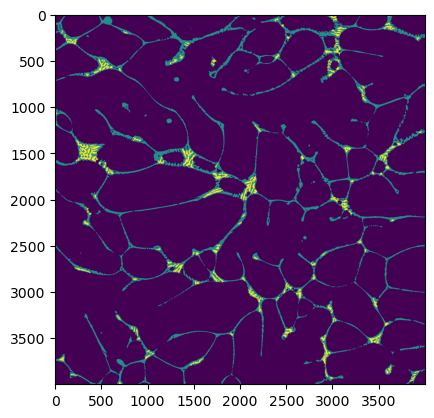